In [2]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [10]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
# fish_data.head()

In [7]:
fish_target = df.loc[cond, ['Species']]
# fish_target

In [9]:
from sklearn.model_selection import train_test_split

In [20]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target)

In [21]:
# test_target

In [26]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [27]:
kn.score(test_input, test_target['Species'])

1.0

In [28]:
kn.predict([[25, 150]])

C:\Users\1-00\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

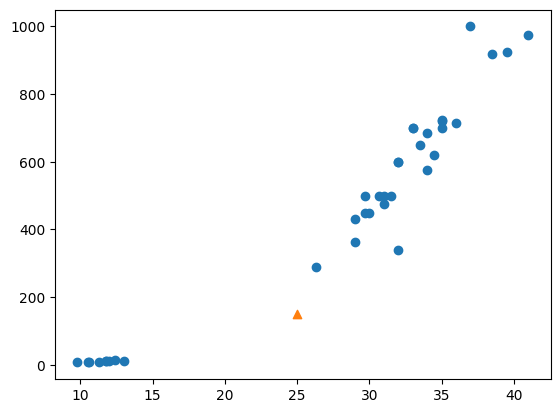

In [33]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')

In [34]:
kn.kneighbors([[25, 150]])

C:\Users\1-00\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[137.17988191, 138.32150953, 140.00603558, 140.62090883,
         140.72046759]]),
 array([[25, 26, 29,  1, 28]]))

In [37]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     27.669444
Weight     463.672222
dtype: float64
Length2      9.946509
Weight     312.197456
dtype: float64


In [41]:
train_scaled = (train_input - mean) / std

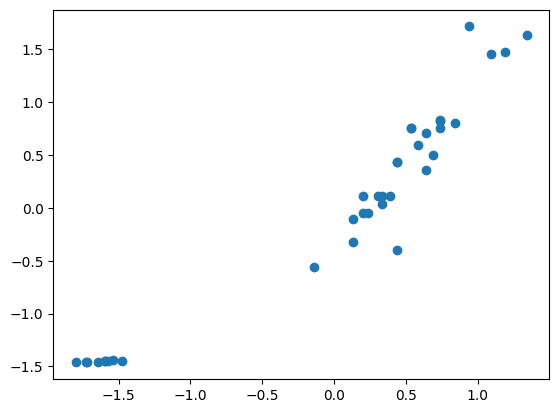

In [42]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [44]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [46]:
test_scaled = (test_input - mean) / std

In [47]:
kn.score(test_scaled, test_target)

1.0